# MSN 514 - Chapter 01: Newton

## Importing numpy and matplotlib

In [1]:
import numpy as np # all kinds of math
import matplotlib.pyplot as plt # for plotting
import ipywidgets # for interactive widgets
%matplotlib inline

In [ ]:
np.sin(np.pi/2)

In [ ]:
x = np.arange(0, 10, 0.1)
y = np.sin(x)
plt.plot(x, y)
plt.show()

## Warmup excersices

### Prime numbers

In [ ]:
def is_prime(num):
    if num < 2:
        return False
    for i in range(2, int(num**0.5) + 1):
        if num % i == 0:
            return False
    return True

def find_prime_numbers(N):
    prime_numbers = []
    for num in range(2, N+1):
        if is_prime(num):
            prime_numbers.append(num)
    return prime_numbers

N = 1000
prime_numbers = find_prime_numbers(N)
print(prime_numbers)


### Collatz conjecture

In [ ]:
def collatz_steps(n):
    steps = 0
    while n != 1:
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3 * n + 1
        steps += 1
    return steps

N = 10000
starting_numbers = list(range(1, N+1))
steps_list = [collatz_steps(num) for num in starting_numbers]

plt.clf()
plt.scatter(np.log(starting_numbers), steps_list, s=0.2)
plt.xlabel('Starting Number')
plt.ylabel('Number of Steps')
plt.title('Collatz Conjecture: Number of Steps vs Starting Number')
plt.show()


### Zoom using plotly

In [ ]:
import plotly.offline as pyo
import plotly.graph_objs as go

data = [go.Scatter(x=np.log(starting_numbers), y=steps_list, mode='markers', marker=dict(size=10))]
layout = go.Layout(title='Collatz Conjecture: Number of Steps vs Starting Number',
                   xaxis=dict(title='Starting Number'),
                   yaxis=dict(title='Number of Steps'))

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='collatz_plot.html')

## Bouncing ball

### Euler's method

In [ ]:
# Constants
g = 9.8  # acceleration due to gravity
dt = 0.01  # time step

# Initial conditions
h0 = 1.0  # initial height
v0 = 0  # initial velocity

# Empty lists to store the time, height, and velocity values
t_values = []
h_values = []
v_values = []

# Euler method simulation
t = 0.0  # initial time
h = h0  # initial height
v = v0  # initial velocity

while t <= 10.0:
    t_values.append(t)
    h_values.append(h)
    v_values.append(v)

    # Update the height and velocity using Euler method
    # h = h + v * dt # Euler method
    h = h + v * dt - g * dt**2 / 2 # Verlet integration
    v = v - g * dt

    # Check for collision with the ground
    if (h < 0.0) and (v < 0.0):
        # h = 0.0 # not a good idea
        v = -v  # reverse the velocity due to the bounce

    t += dt

# Plotting the results
plt.clf()
plt.plot(t_values, h_values)
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Bouncing Ball Simulation using Euler Method')
plt.grid(True)
plt.show()


### Animate bouncing

In [ ]:
from IPython.display import clear_output
import matplotlib.patches as patches

fig, ax = plt.subplots()
circle = patches.Circle((0, 0), radius=0.1, edgecolor='black', facecolor='blue')
ax.add_patch(circle)

for n in range(0,2000,2):
    circle.set_center((0, h_values[n]+0.1))
    plt.ylim(0, 1.5)
    plt.xlim(-0.6, 0.6)
    ax.set_aspect('equal')
    display(fig)
    clear_output(wait=True) 10  # Size of the lattice
temperature = 2.0  # Temperature
spins = ising_model(n, temperature)
print(spins)


## Harmonic Oscillator

### Euler's method for HO

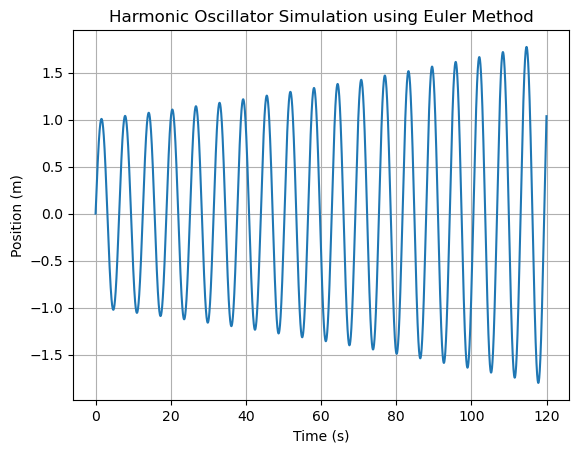

In [18]:
# Constants
k = 1.0  # spring constant
m = 1.0  # mass
dt = 0.01  # time step

# Initial conditions
x0 = 0.0  # initial position
v0 = 1.0  # initial velocity

# Empty lists to store the time, position, and velocity values
t_values = []
x_values = []
v_values = []

# Euler method simulation
t = 0.0  # initial time
x = x0  # initial position
v = v0  # initial velocity

while t <= 120.0:
    t_values.append(t)
    x_values.append(x)
    v_values.append(v)

    # Update the position and velocity using Euler method
    a = -k * x / m  # acceleration
    x = x + v * dt  # Euler method for position
    v = v + a * dt  # Euler method for velocity

    t += dt

# Plotting the results
plt.clf()
plt.plot(t_values, x_values)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Harmonic Oscillator Simulation using Euler Method')
plt.grid(True)
plt.show()

ho_euler = x_values


### Verlet integration

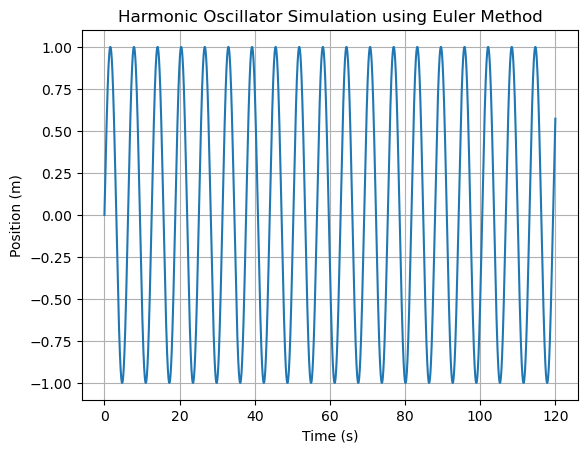

In [19]:
# Constants
k = 1.0  # spring constant
m = 1.0  # mass
dt = 0.01  # time step

# Initial conditions
x0 = 0.0  # initial position
v0 = 1.0  # initial velocity

# Empty lists to store the time, position, and velocity values
t_values = []
x_values = []
v_values = []

# Euler method simulation
t = 0.0  # initial time
x = x0  # initial position
v = v0  # initial velocity

while t <= 120.0:
    t_values.append(t)
    x_values.append(x)
    v_values.append(v)

    # Update the position and velocity using Euler method
    a = -k * x / m  # acceleration
    x = x + v * dt + a * dt**2 / 2 # Verlet integration for next position
    a_next = -k * x / m  # acceleration at the next time step
    v = v + (a + a_next) / 2 * dt  # Verlet integration for velocity

    t += dt

# Plotting the results
plt.clf()
plt.plot(t_values, x_values)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Harmonic Oscillator Simulation using Euler Method')
plt.grid(True)
plt.show()

ho_verlet = x_values


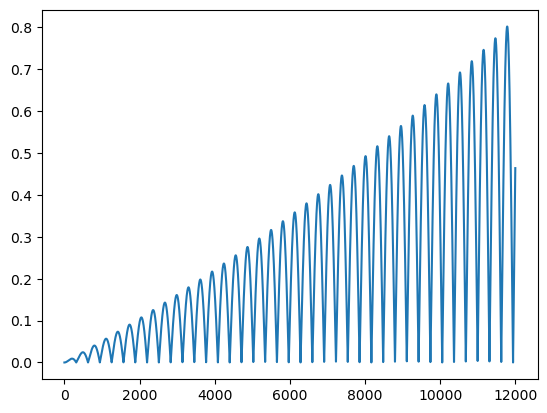

In [23]:
plt.plot(np.abs(np.array(ho_euler) - np.array(ho_verlet)))

## Two balls and a spring

### Verlet integration

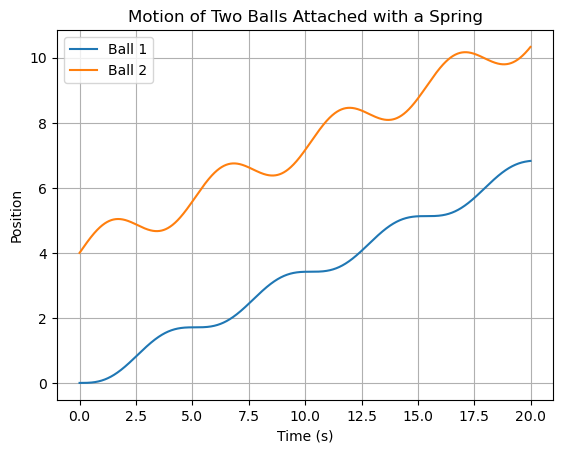

In [24]:
# Constants
k = 1.0  # spring constant
m1 = 2.0  # mass of ball 1
m2 = 1.0  # mass of ball 2
L = 4.0  # rest length of the spring
dt = 0.01  # time step

# Initial conditions
x1 = 0.0  # initial position of ball 1
x2 = 0.0  # initial position of ball 2
v1 = 0.0  # initial velocity of ball 1
v2 = 1.0  # initial velocity of ball 2

# Empty lists to store the time, position, and velocity values
t_values = []
x1_values = []
x2_values = []

# Verlet integration simulation
t = 0.0  # initial time

while t <= 20.0:
    t_values.append(t)
    x1_values.append(x1)
    x2_values.append(x2 + L)

    # Calculate the displacement from the rest length
    dx = x2 - x1

    # Calculate the acceleration of ball 1 and ball 2
    a1 = k * dx / m1
    a2 = -k * dx / m2

    # Update the positions using Verlet integration
    x1 = x1 + v1 * dt + a1 * dt**2 / 2
    x2 = x2 + v2 * dt + a2 * dt**2 / 2

    # Calculate the next acceleration of ball 1 and ball 2
    dx_next = x2 - x1
    a1_next = k * dx_next / m1
    a2_next = -k * dx_next / m2

    # Update the velocities
    v1 = v1 + (a1 + a1_next) / 2 * dt
    v2 = v2 + (a2 + a2_next) / 2 * dt

    t += dt

# Plotting the results
plt.plot(t_values, x1_values, label='Ball 1')
plt.plot(t_values, x2_values, label='Ball 2')
plt.xlabel('Time (s)')
plt.ylabel('Position')
plt.title('Motion of Two Balls Attached with a Spring')
plt.legend()
plt.grid(True)
plt.show()


### Animate two balls

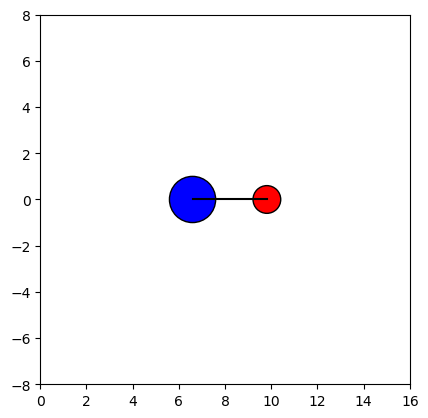

In [25]:
from IPython.display import clear_output
import matplotlib.patches as patches

R1 = 1  # radius of the circle
R2 = 0.6  # radius of the circle
fig, ax = plt.subplots()
circle1 = patches.Circle((0, 0), radius=R1, edgecolor='black', facecolor='blue')
circle2 = patches.Circle((0, 0), radius=R2, edgecolor='black', facecolor='red')
ax.add_patch(circle1)
ax.add_patch(circle2)

line = plt.plot([], [], 'k-')[0]  # line between the circles

for frame in range(0, len(t_values), 100):
    circle1.set_center((x1_values[frame], 0))
    circle2.set_center((x2_values[frame], 0))
    line.set_data([x1_values[frame], x2_values[frame]], [0, 0])  # update line coordinates
    plt.ylim(-8, 8)
    plt.xlim(0, 16)
    ax.set_aspect('equal')
    display(fig)
    clear_output(wait=True)


### Time evolution operator

Let's write down the equations of motion:

$$
m_1 \frac{{d^2}{x_1}}{{dt^2}} = k (x_2 - x_1)
$$

$$
m_2 \frac{{d^2}{x_2}}{{dt^2}} = k (x_1 - x_2)
$$

Note also that:

$$
\frac{{d}{x_1}}{{dt}} = v_1
$$

$$
\frac{{d}{x_2}}{{dt}} = v_2
$$

Now consider a state vector \(r\):

$$
\mathbf{r} = \begin{bmatrix} x_1 \\ x_2 \\ v_1 \\ v_2 \\ \end{bmatrix}
$$

Then the equations above can be written as:

$$
\frac{{d}{r}}{{dt}} = 
\begin{bmatrix} 
0 & 0 & 1 & 0 \\ 
0 & 0 & 0 & 1 \\ 
-k/m_1 & k/m_1 & 0 & 0 \\ 
k/m_2 & -k/m_2 & 0 & 0 \\ 
\end{bmatrix}  r
$$




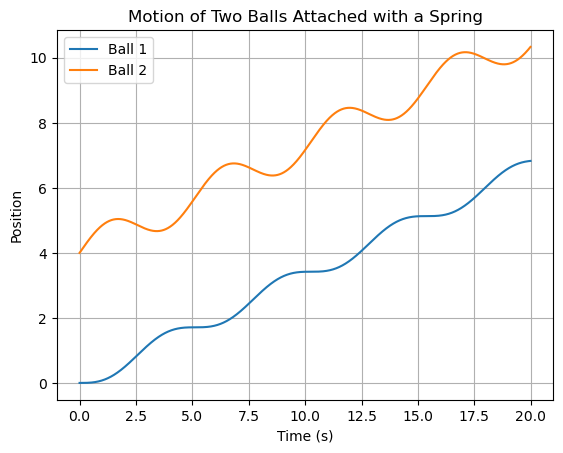

In [26]:
import numpy as np
from scipy.linalg import expm

fig, ax = plt.subplots()

# Constants
k = 1.0  # spring constant
m1 = 2.0  # mass of ball 1
m2 = 1.0  # mass of ball 2
L = 4.0  # rest length of the spring
dt = 0.01  # time step

# Initial conditions
x1 = 0.0  # initial position of ball 1
x2 = 0.0  # initial position of ball 2
v1 = 0.0  # initial velocity of ball 1
v2 = 1.0  # initial velocity of ball 2

# Empty lists to store the time, position, and velocity values
t_values = []
x1_values = []
x2_values = []

# Start time
t = 0.0  # initial time

# Define a matrix
A = np.array([
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [-k/m1, k/m1, 0, 0],
    [k/m2, -k/m2, 0, 0]
])

# Compute the Time Evolution Operator
U = expm(A*dt)

r = np.array([x1, x2, v1, v2])  # initial state vector

while t <= 20.0:
    t_values.append(t)
    x1_values.append(r[0])
    x2_values.append(r[1] + L)

    # Update the state vector
    r = np.dot(U, r)

    t += dt

# Plotting the results
plt.plot(t_values, x1_values, label='Ball 1')
plt.plot(t_values, x2_values, label='Ball 2')
plt.xlabel('Time (s)')
plt.ylabel('Position')
plt.title('Motion of Two Balls Attached with a Spring')
plt.legend()
plt.grid(True)
plt.show()

## Double Pendulum

Derivation of equations using Euler-Lagrange equations is given here;

https://en.wikipedia.org/wiki/Double_pendulum

Derivation using forces is given here;

https://web.mit.edu/jorloff/www/chaosTalk/double-pendulum/double-pendulum-en.html




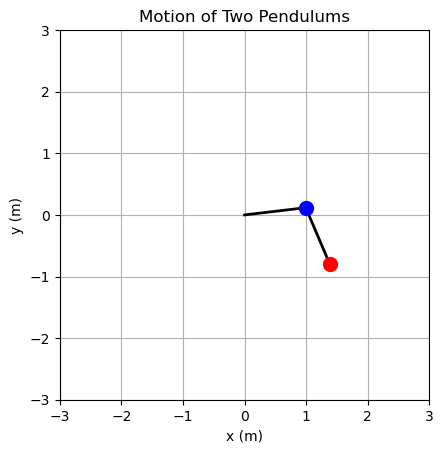

-2.2849593004829076


In [29]:
# Constants
m1 = 1.0  # mass of ball 1
m2 = 1.0  # mass of ball 2
L1 = 1.0  # length of the pendulum 1
L2 = 1.0  # length of the pendulum 2
g = 9.8  # acceleration due to gravity
dt = 0.001  # time step

# Initial conditions
th1 = 1.0  # initial angle theta1
th2 = 1.0  # initial angle theta2
om1 = 0.4  # initial angular velocity of ball 1
om2 = 4.8  # initial angular velocity of ball 2

t = 0.0  # initial time

fig, ax = plt.subplots()

while t <= 10:

    # Plotting the results
    x1 = L1 * np.sin(th1)
    y1 = -L1 * np.cos(th1)
    x2 = x1 + L2 * np.sin(th2)
    y2 = y1 - L2 * np.cos(th2)

    vx1 = L1 * np.cos(th1) * om1
    vy1 = L1 * np.sin(th1) * om1
    vx2 = vx1 + L2 * np.cos(th2) * om2
    vy2 = vy1 + L2 * np.sin(th2) * om2

    Ek = 0.5 * (m1 * (vx1**2 + vy1**2) + m2 * (vx2**2 + vy2**2))
    Ep = m1 * g * y1 + m2 * g * y2

    if (t % 0.1) < dt:
        plt.clf()
        plt.plot([0, x1, x2], [0, y1, y2], lw=2, c='k')
        plt.plot(x1, y1, 'o', c='b', markersize=20 * m1 / (m1 + m2))
        plt.plot(x2, y2, 'o', c='r', markersize=20 * m2 / (m1 + m2))
        plt.xlabel('x (m)')
        plt.ylabel('y (m)')
        plt.title('Motion of Two Pendulums')
        plt.grid(True)
        plt.xlim(-3, 3)
        plt.ylim(-3, 3)
        plt.gca().set_aspect('equal')
        plt.show()
        print(Ek + Ep)
        clear_output(wait=True)
    

    # Calculate the angular acceleration of ball 1 and ball 2
    num1 = -g * (2 * m1 + m2) * np.sin(th1) - m2 * g * np.sin(th1 - 2 * th2) - 2 * np.sin(th1 - th2) * m2 * (om2**2 * L2 + om1**2 * L1 * np.cos(th1 - th2))
    den1 = L1 * (2 * m1 + m2 - m2 * np.cos(2 * th1 - 2 * th2))
    al1 = num1 / den1

    num2 = 2 * np.sin(th1 - th2) * (om1**2 * L1 * (m1 + m2) + g * (m1 + m2) * np.cos(th1) + om2**2 * L2 * m2 * np.cos(th1 - th2))
    den2 = L2 * (2 * m1 + m2 - m2 * np.cos(2 * th1 - 2 * th2))
    al2 = num2 / den2

    # Update the angles using Verlet integration
    th1 = th1 + om1 * dt + al1 * dt**2 / 2
    th2 = th2 + om2 * dt + al2 * dt**2 / 2

    # om1_next = om1
    # om2_next = om2

    # Predict next angular velocities
    om1_next = om1 + al1 * dt
    om2_next = om2 + al2 * dt

    # Calculate the next angular acceleration of ball 1 and ball 2
    num1 = -g * (2 * m1 + m2) * np.sin(th1) - m2 * g * np.sin(th1 - 2 * th2) - 2 * np.sin(th1 - th2) * m2 * (om2_next**2 * L2 + om1_next**2 * L1 * np.cos(th1 - th2))
    den1 = L1 * (2 * m1 + m2 - m2 * np.cos(2 * th1 - 2 * th2))
    al1_next = num1 / den1

    num2 = 2 * np.sin(th1 - th2) * (om1_next**2 * L1 * (m1 + m2) + g * (m1 + m2) * np.cos(th1) + om2_next**2 * L2 * m2 * np.cos(th1 - th2))
    den2 = L2 * (2 * m1 + m2 - m2 * np.cos(2 * th1 - 2 * th2))
    al2_next = num2 / den2    

    # Update the angular velocities
    om1 = om1 + (al1 + al1_next)/2 * dt
    om2 = om2 + (al2 + al2_next)/2 * dt

    t += dt

## Dynamical Matrix Formalism

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

k = 1
m = 1
D = np.array([
    [k/m, -k/m],
    [-k/m, k/m]
])
N = D.shape[0]

# Eigenvalues and eigenvectors
w2, v = np.linalg.eig(D)
print(w2)
print(v)

mode = 1
dt = 0.1
t = 0
while t <= 2:
    r = v[:,n]*np.cos(np.sqrt(w2[mode])*t)/2 + np.linspace(-N/2,N/2,N)
    plt.clf()
    plt.plot(r, np.zeros_like(r), '.', markersize=30)
    plt.plot(r, np.zeros_like(r))
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.gca().set_aspect('equal')
    plt.grid(True)
    plt.show()
    clear_output(wait=True)
    t += dt


[2. 0.]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


NameError: name 'n' is not defined

In [43]:
print(np.sqrt(w2))
print(v)

[1.41421356 0.        ]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


### Interactive plots of modes

In [3]:
import numpy as np
import ipywidgets
import matplotlib.pyplot as plt

N = 6
k1 = 1.0
k2 = 0.5
m = 1.0

D = np.diag([(k1 + k2)/m] * N)
D[0,0] = k1/m
D[-1,-1] = k1/m
for i in range(N-1):
    if i % 2 == 0:
        D[i, i+1] = -k1/m
        D[i+1, i] = -k1/m
    else:
        D[i, i+1] = -k2/m
        D[i+1, i] = -k2/m

# Eigenvalues and eigenvectors
w2, v = np.linalg.eig(D)
sorted_indices = np.argsort(w2) # sort the eigenvalues
w2 = w2[sorted_indices]
v = v[:, sorted_indices]

def plot_func(v,t,mode):
    x = v[:,mode]*np.sin(t)/2 + np.linspace(-N/2,N/2,N)
    y = np.zeros_like(x)
    plt.plot(x, y, '.-', markersize=30)
    plt.title('Mode ' + str(mode) + ' with frequency ' + str(np.sqrt(w2[mode])))
    plt.xlim(-N/2 - 1, N/2 + 1)
    plt.ylim(-1, 1)
    plt.gca().set_aspect('equal')


ipywidgets.interact(plot_func, v=ipywidgets.fixed(v), t=(0, 2*np.pi, 0.1), mode=(0, N-1, 1))

interactive(children=(FloatSlider(value=3.1, description='t', max=6.283185307179586), IntSlider(value=2, descr…

<function __main__.plot_func(v, t, mode)>

### HTML movie of modes

In [48]:
from matplotlib import animation
from IPython.display import HTML

def make_video(x, y):
    fig = plt.figure()

    dots = plt.plot([], linestyle='-', marker='.', markersize=30, color='b')
    dot = dots[0]
    dot.set_markerfacecolor('red')

    plt.xlim(np.min(x.flatten()) - 1, np.max(x.flatten()) + 1)
    plt.ylim(np.min(y.flatten()) - 1, np.max(y.flatten()) + 1)
    plt.gca().set_aspect('equal')

    def animate(frame):
        dot.set_data(x[frame], y[frame])

    ani = animation.FuncAnimation(fig, animate, frames=len(x), interval=20)

    # Convert the animation to HTML5 video.
    video = ani.to_html5_video()

    # Display the video.
    html = HTML(video)
    display(html)

    plt.close()

mode = 4

x = []
y = []
dt = 2*np.pi/100
for i in range(100):
    t = i*dt
    r = v[:,mode]*np.sin(t) + np.linspace(-N/2,N/2,N)*3
    x.append(r)
    y.append(np.zeros_like(r))
x = np.array(x)
y = np.array(y)

make_video(x, y)


### Modes of long chains

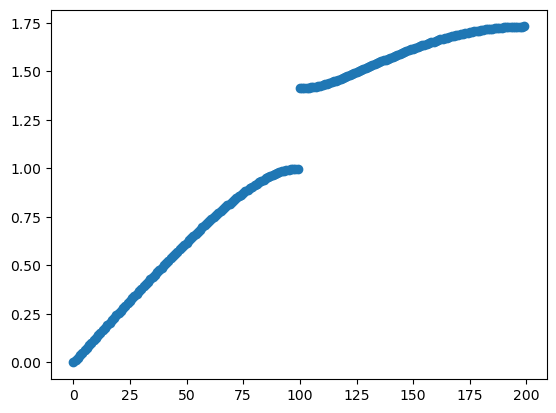

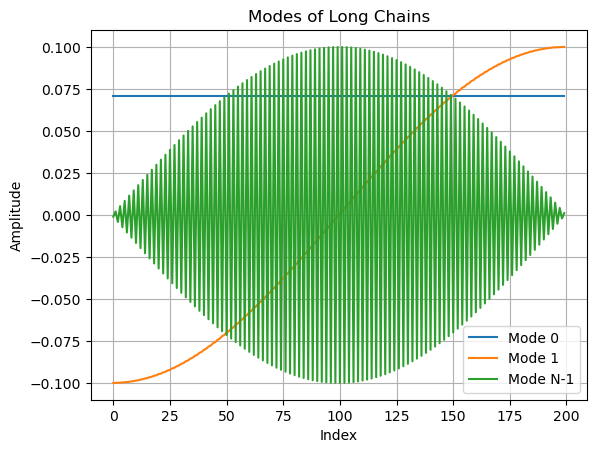

In [56]:
N = 200
k1 = 1.0
k2 = 0.5
m = 1.0

D = np.diag([(k1 + k2)/m] * N)
D[0,0] = k1/m
D[-1,-1] = k1/m
for i in range(N-1):
    if i % 2 == 0:
        D[i, i+1] = -k1/m
        D[i+1, i] = -k1/m
    else:
        D[i, i+1] = -k2/m
        D[i+1, i] = -k2/m

# Eigenvalues and eigenvectors
w2, v = np.linalg.eig(D)
sorted_indices = np.argsort(w2)
w2 = w2[sorted_indices]
v = v[:, sorted_indices]

plt.plot(np.sqrt(np.abs(w2)), 'o')
plt.show()

plt.plot(range(N), v[:, 0], label='Mode 0')
plt.plot(range(N), v[:, 1], label='Mode 1')
plt.plot(range(N), v[:, N-1], label='Mode N-1')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.title('Modes of Long Chains')
plt.legend()
plt.grid(True)
plt.show()


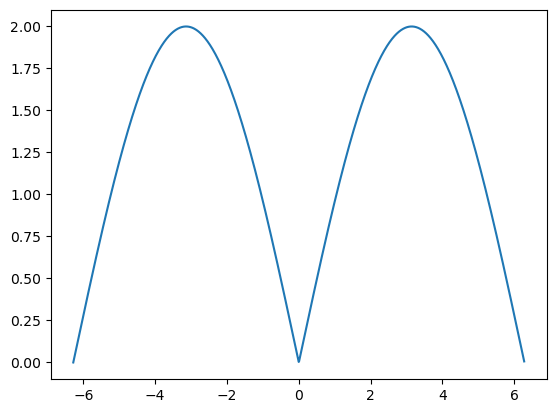

In [55]:
k1 = 1.0
m = 1.0
k = np.arange(-2*np.pi, 2*np.pi, 0.01)
w = np.sqrt(2*k1/m*(1 - np.cos(k)))
plt.plot(k, w)

### Modes of infinite chain

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets

def plot_phon(k2):
    a = 1
    m = 1
    k1 = 1
    kpts = np.linspace(-2*np.pi, 2*np.pi, 200)
    # kpts = np.linspace(0, np.pi, 200)

    def freq(k):
        D = np.array([
            [(k1 + k2)/m, (-k1 - k2*np.exp(-1j*k*a))/m],
            [(-k1 - k2*np.exp(1j*k*a))/m, (k1 + k2)/m]
        ])

        w2, v = np.linalg.eig(D)
        return np.sqrt(np.sort(w2))

    w = []
    for k in kpts:
        w.append(freq(k))
    w = np.array(w)

    plt.plot(kpts, w)
    plt.xlabel('k')
    plt.ylabel('Frequency')
    plt.title('Phonon Dispersion Relation')
    plt.grid(True)
    plt.show()

ipywidgets.interact(plot_phon, k2=(0, 2, 0.1))

interactive(children=(FloatSlider(value=1.0, description='k2', max=2.0), Output()), _dom_classes=('widget-inte…

<function __main__.plot_phon(k2)>

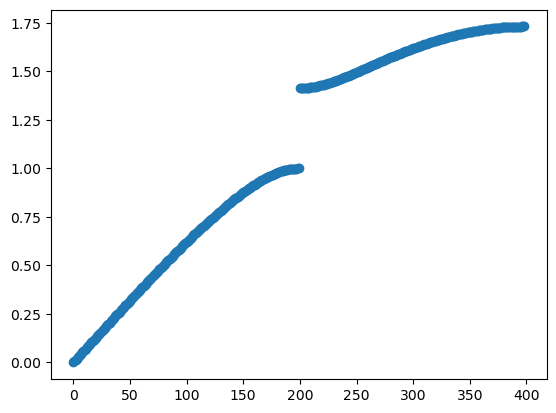

In [38]:
plt.plot(np.concatenate((w[:,0],w[-1:0:-1,1])), 'o')